# Initialization

In [1]:
from os.path import realpath

from matplotlib import pyplot as plt

from PySpice.Unit import *
from subckts import *


# Diode leakage current versus oscilloscope input impedance

The input impedance of the oscilloscope probe influences the measurement. In following simulation a bridge rectifier is simulated. The bridge rectifier In the blue line the output is given of the bridge rectifier loaded with a reverse biased diode. In the orange line the additional load of 10MΩ of the oscilloscope probe is given.

One can see that with only the diode load the leakage current of the diode does cause ripple on the rectified voltage but that with the load of the oscilloscope probe the 150pF capacitance is too small.

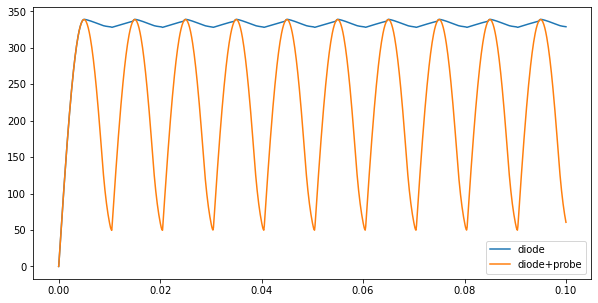

In [2]:
ckt = BridgeDiodeProbe()
sim = ckt.simulator()
trans = sim.transient(step_time=u_ms(0.1), end_time=u_s(0.1))

plt.figure(figsize=(10, 5))
plt.plot(trans.time, trans.rect1, trans.time, trans.rect2)
l = plt.legend(("diode", "diode+probe"))

# Bridge rectifier breaks charging

Second problem with the original design was that I did put a bridge rectifier before the voltage multiplier. I wrongly thought that the voltage on the multiplier stages would average around common voltage if not rectified. This is not the case for the voltage and on the contrary the bridge stops the voltage multiplier from working.

Results can be seen in the following simulation results:

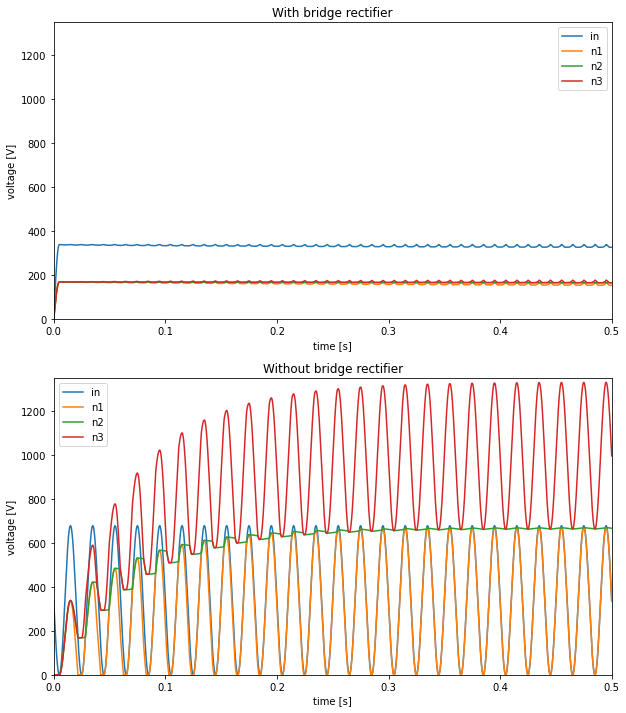

In [3]:
ckt1 = BridgeTwoStage()
sim1 = ckt1.simulator()
trans1 = sim1.transient(step_time=u_ms(0.1), end_time=u_s(0.5))

ckt2 = TwoStage()
sim2 = ckt2.simulator()
trans2 = sim2.transient(step_time=u_ms(0.1), end_time=u_s(0.5))

plt.figure(figsize=(10, 12))
plt.subplot(2,1,1)
plt.title("With bridge rectifier")
plt.plot(
    trans1.time, trans1.rect,
    trans1.time, trans1.n1,
    trans1.time, trans1.n2,
    trans1.time, trans1.n3,
)
plt.axis([0, 0.5, 0, 1350])
plt.legend(("in", "n1", "n2", "n3"))
plt.xlabel("time [s]")
plt.ylabel("voltage [V]")
plt.subplot(2,1,2)
plt.title("Without bridge rectifier")
plt.plot(
    trans2.time, trans2.L,
    trans2.time, trans2.n1,
    trans2.time, trans2.n2,
    trans2.time, trans2.n3,
)
plt.axis([0, 0.5, 0, 1350])
plt.legend(("in", "n1", "n2", "n3"))
plt.xlabel("time [s]")
t = plt.ylabel("voltage [V]")

The reason that the circuit with the bridge rectifier does not work is that the output if the bridge in only low impedance when driving the output voltage hgiher and not lower. This means that the input of the voltage multiplier stays high 340V and the capacitance in the multiplier loses if function as charge pump

# Odd/even nodes in voltage multiplier

The last picture of the simulation for the circuit without bridge rectifier is that there is not DC offset between the odd and even stages in the voltage multiplier. This is what I originally assumed. As one can see the odd node have a DC offset with each other and the even nodes likewise; but the odd nodes have an AC swing relative to the even node. In my design I made use of both odd and even nodes in the voltage multiplier but always used the same reference voltage for the other side. This means that from some of the selected nodes the final charge capacitor will not see a DC voltage but a DC voltage with an AC voltage of 240V.